In [1]:
#Importamos librerias a usar.
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
#Cargamos dataframe de Boston
boston = load_boston()

#Creamos el DataFrame para tener todo unido
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#Información acerca de load_boston
?load_boston

In [4]:
#Obteniendo información
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#Creación dos datasets para la predicción
X = df.drop('Price', axis= 1)
y = df.Price



In [7]:
#dataframes de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)



In [8]:
#Aplicamos regresión limeal
#Ajusta ambos datasets, es decir, encuentra la "mejor línea" que los hace coincidir
#Model fitting is the process of determining the coefficients 𝑏₀, 𝑏₁, …, 𝑏ᵣ 
#that correspond to the best value of the cost function

linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Definimos el valor de nuestras r^2
#Al correr r2 en nuestro test lo hacemos con la esperanza de saber si esta todo ok
#Normalmente se presentaran ambos, test y traind pero test es el que suele ser más importante
#Si se tiene un r2 más bajo en uno que en otro, hay algo que no esta del todo bien. 
#por ejemplo, si  R2test≪R2training indica que el modelo no generaliza bien.
#lo cual, para futuros datos, el modelo no extrapolará de la manera correcta

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)


In [10]:
#coeficientes de nuestras variables
print(linreg.coef_)
#R^2
print(f'Valor R2: {train_score, test_score}')


[-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]
Valor R2: (0.7293585058196337, 0.7634174432138451)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


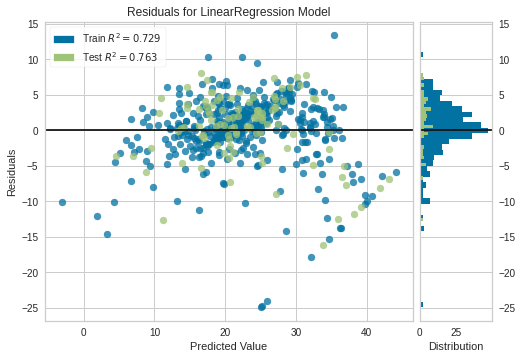

In [11]:
#A residual is the difference between the observed value of the target variable 
#(y) and the predicted value (ŷ), i.e. the error of the prediction. 
#The ResidualsPlot Visualizer shows the difference between residuals on the 
#vertical axis and the dependent variable on the horizontal axis, 
#allowing you to detect regions within the target that may be susceptible to more or less error.

#If the points are randomly dispersed around the horizontal axis, 
#a linear regression model is usually well-suited for the data; otherwise, 
#a non-linear model is more appropriate. The following example shows a fairly 
#random, uniform distribution of the residuals against the target in 
#two dimensions. This seems to indicate that our linear model is performing well

# Yellowbrick's ResidualsPlot Visualizer also displays a histogram of the error 
# values along the right-hand side. In the example above, the error is normally 
# distributed around zero, which also generally indicates a well-fitted mode


from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(linreg, hist=True)
visualizador.fit(X_train, y_train)
visualizador.score(X_test, y_test)
g = visualizador.poof()

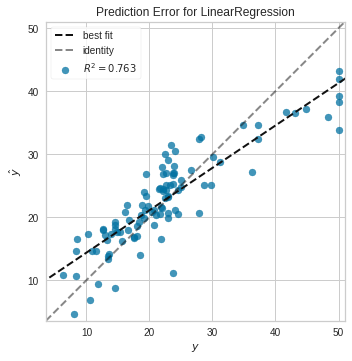

In [12]:
#Yellowbrick's PredictionError Visualizer plots the actual targets from the 
#dataset against the predicted values generated by the model. 
#This allows us to see how much variance is in the model. Data scientists 
#can diagnose regression models using this plot by comparing against the 
#45-degree line, where the prediction exactly matches the model.

from yellowbrick.regressor import PredictionError
visualizador = PredictionError(linreg)
visualizador.fit(X_train, y_train)
visualizador.score(X_test, y_test)
g = visualizador.poof()

In [13]:
y_pred=linreg.predict(X_test)
#Visualmente después de sacar la predicción hacemos el match con la gráfica de
#arriba
df_predicted = pd.DataFrame({'ACtual':y_test,'Predicted':y_pred})
df_predicted

,ACtual,Predicted
307,28.2,32.655032
343,23.9,28.093495
47,16.6,18.029018
67,22.0,21.476716
362,20.8,18.825439
...,...,...
92,22.9,29.089918
224,44.8,37.119379
110,21.7,20.532710
426,10.2,17.368400


In [14]:
#After training a scikit-learn model, it is desirable to have a way to persist 
#the model for future use without having to retrain.

#Aquí guardamos el modelo que ya entrenamos
from joblib import dump, load
dump(linreg, 'model_persist.joblib')


['model_persist.joblib']

In [15]:
#así lo mandaríaamos a llamar
linreg = load('model_persist.joblib')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


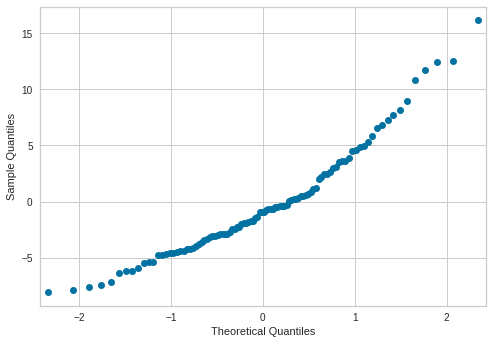

In [16]:
#All point of quantiles lie on or close to straight line at an angle
#of 45 degree from x – axis. It indicates that two samples have similar distributions.
#It indicates y values have a tendency to be lower than x values.
#This plot will compare the residuals with a theoretical normal distribution.

#If the graph of the actual vs. the theoretical will produce a linear pattern, 
#this means that the residuals are approximately normally distributed.
import statsmodels.api as sm
import pylab as py 
  
predicciones = linreg.predict(X_test)
residuales = y_test - predicciones
sm.qqplot(residuales)
py.show()

# ·Ridge
One of the biggest problems faced by data analyst while building regression models is when he data suffers from multicollinearity. Multicollinearity is a situation that occurs when independent variables are highly correlated.This is the case when we apply Ridge regression to our data.

The main idea behind ridge regression algorithm is to find a new line that doesn’t fit the training data as well. In other words we introduce a small bias into how the new line is fit to the data. 

Cuando queremos mejorar la estimaciòn de nuestra regresiòn usamos Ridge. Agrega una penalizaciòn a todos nuestros coeficientes. Bàsicamente lo que intentamos hacer con esto es ir moviendo nuestros coeficientes a 0

In [17]:
#Usando regresión de Ridge
#Con un alpha default de 1

rr = Ridge()
rr.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
#Usando regresión de Ridge
#Con un alpha default de 100
rr20 = Ridge(alpha=20)
rr20.fit(X_train, y_train)


Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [19]:
#Entrenando ambos modelos
Ridge_train_score = rr.score(X_train, y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score20 = rr20.score(X_train, y_train)
Ridge_test_score20 = rr20.score(X_test, y_test)


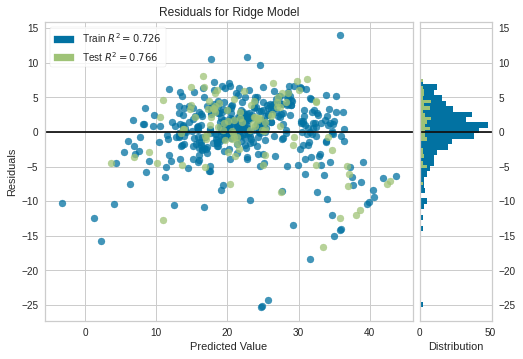

In [20]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(rr, hist=True)
visualizador.fit(X_train, y_train)
visualizador.score(X_test, y_test)
g = visualizador.poof()

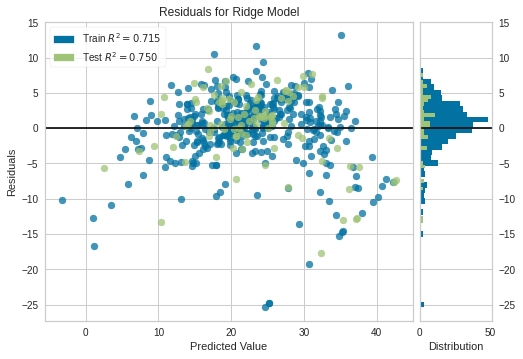

In [21]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(rr20, hist=True)
visualizador.fit(X_train, y_train)
visualizador.score(X_test, y_test)
g = visualizador.poof()

In [22]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score20)
print("ridge regression test score high alpha:", Ridge_test_score20)

linear regression train score: 0.7293585058196337
linear regression test score: 0.7634174432138451
ridge regression train score low alpha: 0.7264412428697166
ridge regression test score low alpha: 0.7655800611077147
ridge regression train score high alpha: 0.71506192013302
ridge regression test score high alpha: 0.7500172335648554


In [23]:
from sklearn.model_selection import GridSearchCV
from numpy import arange
from sklearn.model_selection import RepeatedKFold
# Usaremos crossvalidation con RepeatedKFold
# Es apropiado usar REpeated KFold ya que, en este caso, estaremos probando
# nuestro modelo con 30 diferentes datasets e, lugar de 10. 

# Cabe destacar que se debe usar cuando: tenemos datasets pequeños o medianos
# y los modelos no son computacionalmente pesados para ajustarlos y evaluarlos como en 
# el caso de redes neuronales.
# Permite reducir el ruido que sea causado por KFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [24]:
# Definimos el grio de nuestros parametros
# ·de 0 a 1 con paso de .01
grid = dict()
grid['alpha'] = arange(0, 1, .01)

In [25]:
rr_best = Ridge()
# Definimos la busqueda de nuestro mejor parametro
# es una clase disponible en scikit-learn que permite evaluar y seleccionar 
# de forma sistemática los parámetros de un modelo. Indicándole un modelo y 
# los parámetros a probar, puede evaluar el rendimiento del primero en función 
# de los segundos mediante validación cruzada.

# Usamos neg_mean porquè no existe la positiva y lo que hace Grid Search
# Es rankear todos los estimadores diciendonos cual es el mejor, solo que aquì
# sklearn, cuando usamos la funcion de error serà rankeado mucho mayor uno que
# se comporte mejor y para neustra metrica no es el caso que necesitamos ver
# por eso usamos Neg_mae

# caso contrario a MAE, un valor màs positivo es mejor.
# n_jobs es para usar todos los procesadores disponibles al mismos tiempo.
mejor_param_busqueda = GridSearchCV(rr_best, 
                                    grid, 
                                    scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [26]:
# Hacemos fit con nuestra busqueda
results = mejor_param_busqueda.fit(X_train, y_train)
# Obtenemos el mejor parametro
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.316
Config: {'alpha': 0.61}


In [27]:
rr_best_param = Ridge(alpha=.61)
rr_best_param.fit(X_train, y_train)

Ridge(alpha=0.61, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

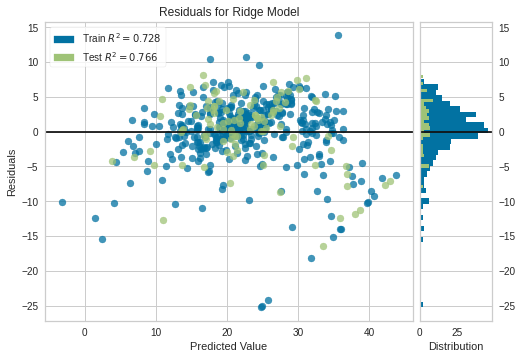

In [28]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(rr_best_param, hist=True)
visualizador.fit(X_train, y_train)
visualizador.score(X_test, y_test)
g = visualizador.poof()

In [29]:
Ridge_train_score_best_para = rr_best_param.score(X_train, y_train)
Ridge_test_best_para = rr_best_param.score(X_test, y_test)

In [30]:
print(linreg.coef_)

[-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]


In [31]:
print(rr_best_param.coef_)

[-1.08683737e-01  5.84802989e-02 -1.02673092e-02  1.99529910e+00
 -1.31119403e+01  3.14995217e+00 -8.82123338e-04 -1.40476114e+00
  2.90747626e-01 -1.17382086e-02 -9.15989845e-01  7.65639291e-03
 -5.52397765e-01]


In [32]:
#Al correr r2 en nuestro test lo hacemos con la esperanza de saber si esta todo ok
#Normalmente se presentaran ambos, test y traind pero test es el que suele ser más importante
#Si se tiene un r2 más bajo en uno que en otro, hay algo que no esta del todo bien. 
#por ejemplo, si  R2test≪R2training indica que el modelo no generaliza bien.
#lo cual, para futuros datos, el modelo no extrapolará de la manera correcta

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score20)
print("ridge regression test score high alpha:", Ridge_test_score20)
print("ridge regression train score best alpha:", Ridge_train_score_best_para)
print("ridge regression test score best alpha:", Ridge_test_best_para)

linear regression train score: 0.7293585058196337
linear regression test score: 0.7634174432138451
ridge regression train score low alpha: 0.7264412428697166
ridge regression test score low alpha: 0.7655800611077147
ridge regression train score high alpha: 0.71506192013302
ridge regression test score high alpha: 0.7500172335648554
ridge regression train score best alpha: 0.7277674789704478
ridge regression test score best alpha: 0.7655789035784946


# Logistic Regression

In [33]:
#Importamos Drive a Colab
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:



ValueError: ignored

In [ ]:
#Leemos csv de Titanic
titanic = pd.read_csv('/content/drive/MyDrive/Databases/Week 17/titanic.csv')
titanic.describe()

In [ ]:
#Hacemos un poco de exploración para ver que tiene
titanic.info()

In [ ]:
#Nulos
titanic.isnull().sum(axis=0)

In [ ]:
#Eliminamos variables que no nos sean utiles para nuestro dummies
titanic_drop = titanic.drop(columns=['Name', 'Cabin', 'PassengerId', 'Ticket']).copy()
titanic_drop

In [ ]:
#Eliminamos columnas con valores faltantes
titanic_missing = titanic_drop.dropna()
titanic_missing

In [ ]:
#Grafica sencialla
sns.countplot(x='Survived',data=titanic_missing)


In [ ]:
#Graficando por clases
sns.countplot(x='Survived',hue='Pclass',data=titanic_missing)

In [ ]:
#Creamos dummies de variables categoricas
#Quitando redundancia con drop_frist
titanic_con_dummies = pd.get_dummies(titanic_missing, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
titanic_con_dummies.head()

In [ ]:
#Importamos LogisticRegression
#Generamos dos datasets
#Uno que tenga todas las columnas a excepción de Survived
#Otro que tenga solo survided
#Será apra ver si con los datos del primero podemos predecir los datos del segundo
from sklearn.linear_model import LogisticRegression
x_columns =[col for col in titanic_con_dummies.columns.values if col != 'Survived']
titanic_x = titanic_con_dummies[x_columns]
titanic_y = titanic_con_dummies['Survived']



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_x, 
                                                    titanic_y, test_size=0.20, 
                                                    random_state=101)

In [ ]:
#Entrenamos el modelo y vemos su ACCURACY
#For small datasets, ‘liblinear’ is a good choice, 
#whereas ‘sag’ and ‘saga’ are faster for large ones.
#newton-cg — A newton method. Newton methods use an exact Hessian matrix. 
#liblinear — Library for Large Linear Classification. Uses a coordinate descent algorithm. 
#lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations. 

#STACK http://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions/52388406#52388406
titanic_model = LogisticRegression(solver='liblinear')
titanic_model.fit(titanic_x, titanic_y)

In [ ]:
#Predicted vs actual
y_pred=titanic_model.predict(X_test)
df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predicted

In [ ]:
# mide cómo de a menudo el clasificador realiza la predicción correcta. 
#Es el ratio de número de predicciones correctas contra el número total 
#de predicciones (el número de puntos de datos de prueba)
#Return the mean accuracy on the given test data and labels.
titanic_model.score(X_train, y_train)

In [ ]:
parameters = titanic_model.coef_
parameters

#Accuracy

In [ ]:
from sklearn.metrics import accuracy_score 
y_pred=titanic_model.predict(titanic_x)
accuracy = accuracy_score(titanic_y,y_pred)
accuracy

#ROC-AUC

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
#The Receiver Operator Characteristic (ROC) curve is an evaluation metric for 
# binary classification problems. It is a probability curve that plots the 
# TPR against FPR at various threshold values and essentially separates the 
# ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure 
# of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
y_pred_proba = titanic_model.predict_proba(titanic_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(titanic_y,  y_pred_proba)
auc = metrics.roc_auc_score(titanic_y, y_pred_proba)
plt.plot(fpr,tpr)

In [34]:
# The higher the AUC, the better the performance of the model 
#at distinguishing between the positive and negative classes.
auc

NameError: ignored